# WeatherPy
----

#### Observations
1) City Temperature vs Latitude for both Southern and Northern Hemisphere both show a high correlation. The Southern Hemisphere temperatures were closer in range than Northern Hemisphere.
2) The correlation between Latitude vs Cloudiness/Wind Speed is low.
3) The correlation between Latitude vs Wind Speed is low. In both Hemisphere's wind speed was relatively around the same speed but there was more dots on the scatter plot in the Northern Hemisphere. this could be due to more mountains in the Northern Hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
weather_data_df = pd.read_csv(output_data_file, delimiter=",")
weather_data_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [5]:
# set of list
city_id_list = []
city_name_list = []
country_list = []
max_temp_list = []
lat_list = []
lng_list = []
humidity_list = []
cloudiness_list = [] 
wind_speed_list = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get( url + "&q=" + city).json()
    try:
        city_id= response['id']
        city_id_list.append(city_id)

        city_name = response['name']
        city_name_list.append(city_name)

        country = response['sys']['country']
        country_list.append(country)

        max_temp = response['main']['temp_max']
        max_temp_list.append(max_temp)

        lat = response['coord']['lat']
        lat_list.append(lat)

        lng = response['coord']['lon']
        lng_list.append(lng)

        humidity = response['main']['humidity']
        humidity_list.append(humidity)

        cloudiness = response['clouds']['all']
        cloudiness_list.append(cloudiness)

        wind_speed = response['wind']['speed']
        wind_speed_list.append(wind_speed)

        print(f"Cities Name: {city}, Cities ID: {city_id}")
    except:
        print(f"No city name found")

Cities Name: khatanga, Cities ID: 2022572
Cities Name: bambous virieux, Cities ID: 1106677
No city name found
Cities Name: rikitea, Cities ID: 4030556
Cities Name: qaanaaq, Cities ID: 3831208
Cities Name: carnarvon, Cities ID: 2074865
Cities Name: lagoa, Cities ID: 3372964
Cities Name: lebu, Cities ID: 3883457
Cities Name: tadine, Cities ID: 2138285
Cities Name: tasiilaq, Cities ID: 3424607
Cities Name: waipawa, Cities ID: 2206874
Cities Name: chokurdakh, Cities ID: 2126123
Cities Name: hamilton, Cities ID: 4513583
Cities Name: basoko, Cities ID: 219414
Cities Name: thompson, Cities ID: 6165406
Cities Name: port alfred, Cities ID: 964432
No city name found
Cities Name: sembe, Cities ID: 2255304
Cities Name: fomboni, Cities ID: 921889
Cities Name: kruisfontein, Cities ID: 986717
Cities Name: mukhen, Cities ID: 2019718
Cities Name: steffisburg, Cities ID: 2658494
Cities Name: albany, Cities ID: 5106841
Cities Name: mataura, Cities ID: 6201424
No city name found
Cities Name: mar del plata

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df = pd.DataFrame({'City ID': city_id_list, 'City': city_name_list, 'Country': country_list, 
                            'Max Temp': max_temp_list, 'Lat': lat_list, 'Lng': lng_list, 
                            'Humidity': humidity_list, 'Cloudiness': cloudiness_list, 'Wind Speed': wind_speed_list})
cities_df.head()

,City ID,City,Country,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed
0,2022572,Khatanga,RU,-4.56,71.9667,102.5000,94,98,13.76
1,1106677,Bambous Virieux,MU,74.21,-20.3428,57.7575,75,93,5.32
2,4030556,Rikitea,PF,79.21,-23.1203,-134.9692,70,48,15.52
3,3831208,Qaanaaq,GL,-20.94,77.4840,-69.3632,70,97,7.16
4,2074865,Carnarvon,AU,80.67,-24.8667,113.6333,69,0,6.91


In [7]:
# Export dataframe csv file
cities_df.to_csv("cities_df.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%
humidity = cities_df["Humidity"].tolist()
humidity.sort(reverse=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

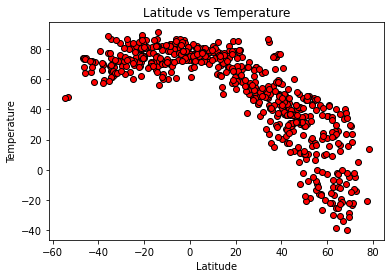

Looking at Latitude vs Temperature we see that as the Latitude increases Temperature goes down.


In [9]:
plt.scatter(lat_list, max_temp_list, marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig("Images/Latitude_vs_Temperature.png")
plt.show()
print(f"Looking at Latitude vs Temperature we see that as the Latitude increases Temperature goes down.")

## Latitude vs. Humidity Plot

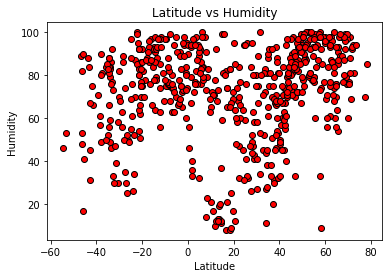

Looking at Latitude vs Humidity we see that as Latitude increases there tends to be higher Humidity.


In [10]:
plt.scatter(lat_list, humidity_list, marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Images/Latitude_vs_Humidity.png")
plt.show()
print(f"Looking at Latitude vs Humidity we see that as Latitude increases there tends to be higher Humidity.")

## Latitude vs. Cloudiness Plot

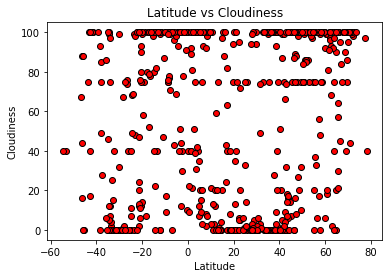

Looking at Latitude vs Cloudiness we see that even when the Latitude is high or low there is a high or low amount of Cloudiness.


In [11]:
plt.scatter(lat_list, cloudiness_list, marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Images/Latitude_vs_Cloudiness.png")
plt.show()
print(f"Looking at Latitude vs Cloudiness we see that even when the Latitude is high or low there is a high or low amount of Cloudiness.")

## Latitude vs. Wind Speed Plot

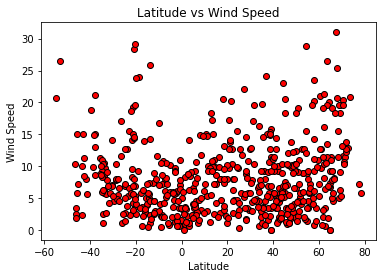

Looking at Latitude vs Wind Speed we see that Wind Speed stays relatively low even as Latitude increases.


In [12]:
plt.scatter(lat_list, wind_speed_list, marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("Images/Latitude_vs_WindSpeed.png")
plt.show()
print(f"Looking at Latitude vs Wind Speed we see that Wind Speed stays relatively low even as Latitude increases.")

## Linear Regression

In [23]:
#Using locs to divide Northern and Southern Hemispheres 
north = cities_df.loc[cities_df['Lat']>0]
south = cities_df.loc[cities_df['Lng']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

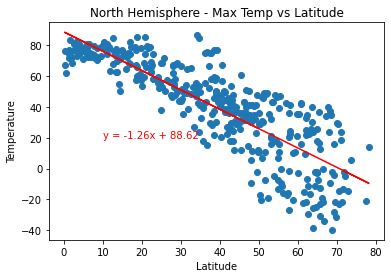

(-0.8357984158495634, 2.708896525208139e-102)
--------
Looking at North Hemisphere-Max Temp vs Latitude we see that there is a high cluster of temperatures when the latitude is low but as latitude increases temperature decreases and is not as clustered.


In [24]:
x_values = north["Lat"]
y_values = north["Max Temp"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.title('North Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Temperature")

plt.savefig("Images/NH_MaxTemp_vs_Lat.png")
plt.show()
print(correlation)
print('--------')
print(f"Looking at North Hemisphere-Max Temp vs Latitude we see that there is a high cluster of temperatures when the latitude is low but as latitude increases temperature decreases and is not as clustered.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

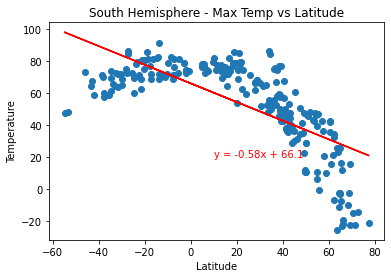

(-0.7123196376333937, 2.6993322815087108e-36)
--------
Looking at Southern Hemisphere-Max Temp vs Latitude we see just like in Northern Hemisphere as the latitude increases temperature decreases.


In [25]:
x_values = south["Lat"]
y_values = south["Max Temp"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.title('South Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Temperature")

plt.savefig("Images/SH_MaxTemp_vs_Lat.png")
plt.show()
print(correlation)
print('--------')
print(f"Looking at Southern Hemisphere-Max Temp vs Latitude we see just like in Northern Hemisphere as the latitude increases temperature decreases.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

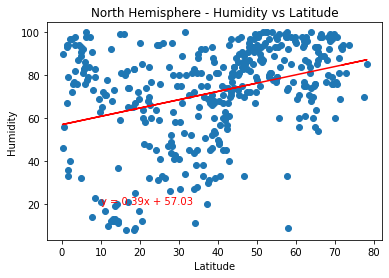

(0.33674811677078487, 1.0254273371593257e-11)
--------
Looking at Nouthern Hemisphere-Humidity vs Latitude we see as latitude increases Humidity increases as well. Just as the Linear Regression line shows.


In [26]:
x_values = north["Lat"]
y_values = north["Humidity"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.title('North Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Humidity")

plt.savefig("Images/NH_Humidity_vs_Lat.png")
plt.show()
print(correlation)
print('--------')
print(f"Looking at Nouthern Hemisphere-Humidity vs Latitude we see as latitude increases Humidity increases as well. Just as the Linear Regression line shows.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

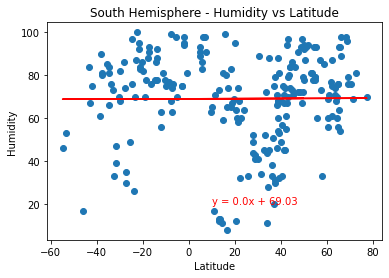

(0.005329934683152109, 0.9364895843488512)
--------
Looking at Southern Hemisphere-Humidity vs Latitude we see Humidity stays relatively high even as latitude increase. Just as the Linear Regression line shows.


In [27]:
x_values = south["Lat"]
y_values = south["Humidity"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.title('South Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Humidity")

plt.savefig("Images/SH_Humidity_vs_Lat.png")
plt.show()
print(correlation)
print('--------')
print(f"Looking at Southern Hemisphere-Humidity vs Latitude we see Humidity stays relatively high even as latitude increase. Just as the Linear Regression line shows.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

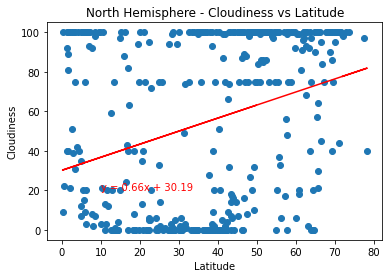

(0.31065533992242034, 4.190412146964281e-10)
--------
Looking at Nouthern Hemisphere-Cloudiness vs Latitude we see that cloudiness increases as latitude increases. Just as the Linear Regression line shows. We also see there is a large cluster of cloudiness when the latitude is low. Just as the Linear Regression line shows.


In [28]:
x_values = north["Lat"]
y_values = north["Cloudiness"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.title('North Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")

plt.savefig("Images/NH_Cloudiness_vs_Lat.png")
plt.show()
print(correlation)
print('--------')
print(f"Looking at Nouthern Hemisphere-Cloudiness vs Latitude we see that cloudiness increases as latitude increases. Just as the Linear Regression line shows. We also see there is a large cluster of cloudiness when the latitude is low. Just as the Linear Regression line shows.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

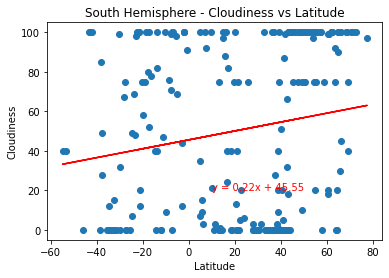

(0.17450301970717474, 0.008563352516369156)
--------
Looking at Southern Hemisphere-Cloudiness vs Latitude we see that as latitude increases cloudiness increases as well. Just as the Linear Regression line shows.


In [29]:
x_values = south["Lat"]
y_values = south["Cloudiness"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.title('South Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")

plt.savefig("Images/SH_Cloudiness_vs_Lat.png")
plt.show()
print(correlation)
print('--------')
print(f"Looking at Southern Hemisphere-Cloudiness vs Latitude we see that as latitude increases cloudiness increases as well. Just as the Linear Regression line shows.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

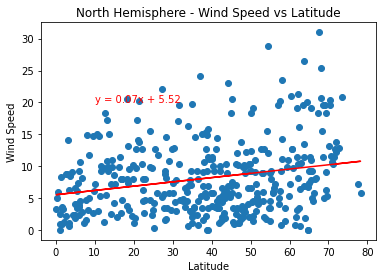

(0.23926776503817365, 1.925830307706067e-06)
--------
Looking at Nouthern Hemisphere-Wind Speed vs Latitude we see that wind speed stays relatively low even as latitude increases, but as latitude increase wind speed increases ever so slightly. Just as the Linear Regression line shows.


In [30]:
x_values = north["Lat"]
y_values = north["Wind Speed"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.title('North Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")

plt.savefig("Images/NH_WindSpeed_vs_Lat.png")
plt.show()
print(correlation)
print('--------')
print(f"Looking at Nouthern Hemisphere-Wind Speed vs Latitude we see that wind speed stays relatively low even as latitude increases, but as latitude increase wind speed increases ever so slightly. Just as the Linear Regression line shows.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

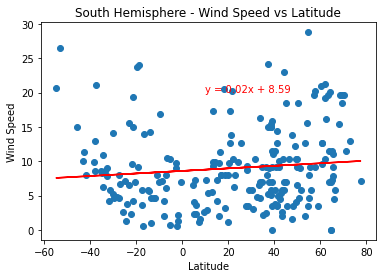

(0.10753692685408422, 0.10688601225502543)
--------
Looking at Southern Hemisphere-Humidity vs Latitude we see at higher latitude wind speed increases but wind speed is relatively around the same range even as Latitude increase. Just as the Linear Regression line shows.


In [31]:
x_values = south["Lat"]
y_values = south["Wind Speed"]

#Correlation 
correlation = st.pearsonr(x_values,y_values)

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.title('South Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")

plt.savefig("Images/SH_WindSpeed_vs_Lat.png")
plt.show()
print(correlation)
print('--------')
print(f"Looking at Southern Hemisphere-Humidity vs Latitude we see at higher latitude wind speed increases but wind speed is relatively around the same range even as Latitude increase. Just as the Linear Regression line shows.")